# 1. Import Library

In [1]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [2]:
path_electricity_generation = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\Electricity_Generation_Processed.csv"
path_population = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\population_monthly.csv"
path_sunshine = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\sunshine_monthly.csv"
path_humidity = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-humidity-handled-data.csv"
path_rainfall = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-rainfall-handled-data.csv"
path_temperature = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-temperature-handled-data.csv"

In [6]:
electricity_df = pd.read_csv(path_electricity_generation)
population_df = pd.read_csv(path_population)
sunshine_df = pd.read_csv(path_sunshine)
humidity_df = pd.read_csv(path_humidity)
rainfall_df = pd.read_csv(path_rainfall)
temperature_df = pd.read_csv(path_temperature)

In [3]:
# List các đường dẫn
paths = [
    path_electricity_generation,
    path_population,
    path_sunshine,
    path_humidity,
    path_rainfall,
    path_temperature,
]

In [4]:
YEARS = [year for year in range(2002, 2023)]

In [5]:
MONTHS = [month for month in range(1, 13)]

# 2. Prediction Using ARIMA Model

## 2.1 Check for stationarity using time series plotting

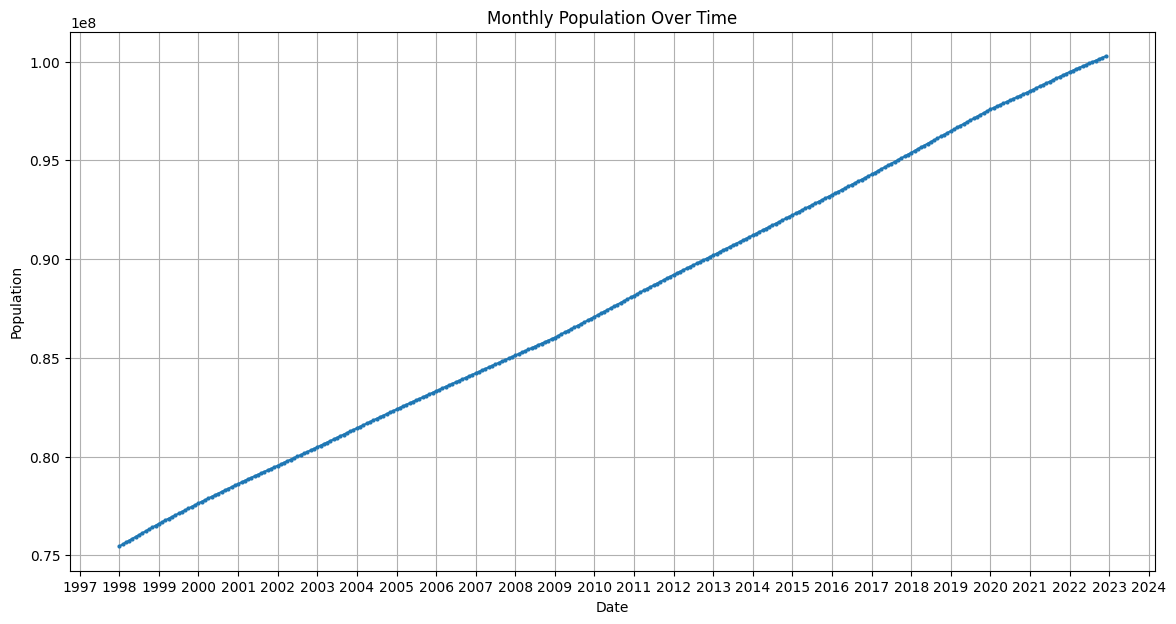

In [8]:
# Tạo cột Date từ Year và Month
population_df['Date'] = pd.to_datetime(population_df[['Year', 'Month']].assign(Day=1))

# Đặt cột Date làm chỉ mục
population_df.set_index('Date', inplace=True)

# Vẽ đồ thị
plt.figure(figsize=(14, 7))
plt.plot(population_df.index, population_df['Population'], marker='o', markersize=2)

# Thiết lập nhãn cho trục x và trục y
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Monthly Population Over Time')

# Định dạng nhãn trục x để hiển thị mỗi năm một lần
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hiển thị đồ thị
plt.grid(True)
plt.show()

## 2.2 Check for stationarity using time series plotting using ACF Plot and PACF Plot

In [10]:
population_df.head()

,Year,Month,Population
Date,,,
1998-01-01,1998,1,75456300.00
1998-02-01,1998,2,75551333.33
1998-03-01,1998,3,75646366.67
1998-04-01,1998,4,75741400.00
1998-05-01,1998,5,75836433.33


ValueError: x is required to have ndim 1 but has ndim 2

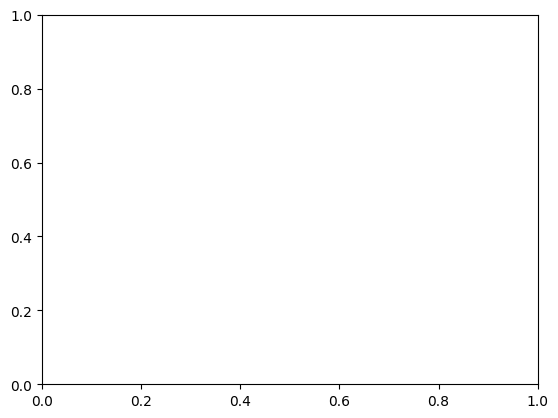

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(population_df)

pacf_original = plot_pacf(population_df)